<a href="https://colab.research.google.com/github/gopikasuresh6050/Azure-Based-Demand-Forecasting-Capacity-Optimization-System/blob/main/azure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*the goal of this project is to analyze azure cloud usage data along with external factors such as economic index ,seasonal factors and holidays*

In [ ]:
import pandas as pd
df=pd.read_excel("dataset.xlsx")
df.head()

,Timestamp,Region,Service,Usage_Units,Provisioned_Capacity,Cost_USD,Availability_%,Holiday,Economic_Index,Seasonal_Factor
0,2023-01-01,eastus,Compute,401,500,200.50,99.90,1,108.81,High
1,2023-01-01,westeurope,Storage,8028,10000,80.28,99.95,1,90.22,Medium
2,2023-01-02,eastus,Compute,408,500,204.00,99.90,0,102.90,High
3,2023-01-02,westeurope,Storage,7984,10000,79.84,99.95,0,99.50,Medium
4,2023-01-03,eastus,Compute,411,500,205.50,99.90,0,104.37,High


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

the dataset contains 540 records with 10 columns including usage,region,cost,service type and external factors

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             540 non-null    object 
 1   Region                540 non-null    object 
 2   Service               540 non-null    object 
 3   Usage_Units           540 non-null    int64  
 4   Provisioned_Capacity  540 non-null    int64  
 5   Cost_USD              540 non-null    float64
 6   Availability_%        540 non-null    float64
 7   Holiday               540 non-null    int64  
 8   Economic_Index        540 non-null    float64
 9   Seasonal_Factor       540 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 42.3+ KB


*there are no missing values in the database.all columns have 540 entries data type are appropriate for analysis*

In [ ]:
df.describe()

,Usage_Units,Provisioned_Capacity,Cost_USD,Availability_%,Holiday,Economic_Index
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,4446.746296,5775.000000,156.743704,99.916852,0.285185,99.882889
std,3996.541343,5261.754665,73.523959,0.034287,0.451921,5.892948
min,395.000000,500.000000,79.500000,99.850000,0.000000,90.090000
25%,458.750000,550.000000,84.290000,99.900000,0.000000,94.595000
50%,4235.500000,5300.000000,143.330000,99.910000,0.000000,99.675000
75%,8429.000000,11000.000000,229.125000,99.950000,1.000000,105.150000
max,8916.000000,12000.000000,260.500000,99.950000,1.000000,109.970000


In [ ]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["Year"]=df["Timestamp"].dt.year
df["Month"]=df["Timestamp"].dt.month
df["Utilization_%"]=df["Usage_Units"]/df["Provisioned_Capacity"]*100
df.head()

,Timestamp,Region,Service,Usage_Units,Provisioned_Capacity,Cost_USD,Availability_%,Holiday,Economic_Index,Seasonal_Factor,Year,Month,Utilization_%
0,2023-01-01,eastus,Compute,401,500,200.50,99.90,1,108.81,High,2023,1,80.20
1,2023-01-01,westeurope,Storage,8028,10000,80.28,99.95,1,90.22,Medium,2023,1,80.28
2,2023-01-02,eastus,Compute,408,500,204.00,99.90,0,102.90,High,2023,1,81.60
3,2023-01-02,westeurope,Storage,7984,10000,79.84,99.95,0,99.50,Medium,2023,1,79.84
4,2023-01-03,eastus,Compute,411,500,205.50,99.90,0,104.37,High,2023,1,82.20


*in this section we analyse usage trend,cost patters and relationship between variables*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
type(df)

pandas.core.frame.DataFrame

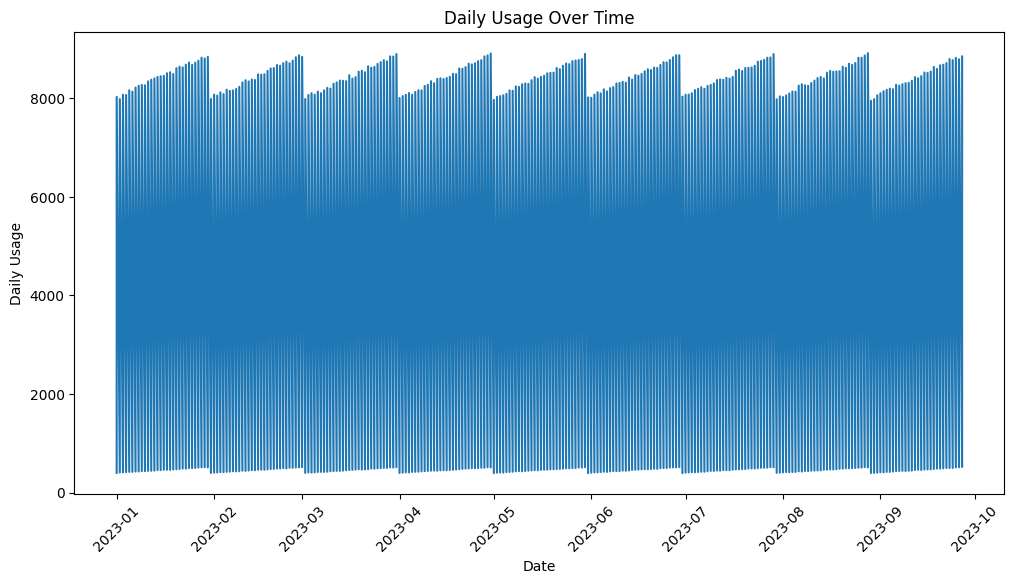

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df["Timestamp"],df["Usage_Units"])
plt.title("Daily Usage Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Usage")
plt.xticks(rotation=45)
plt.show()

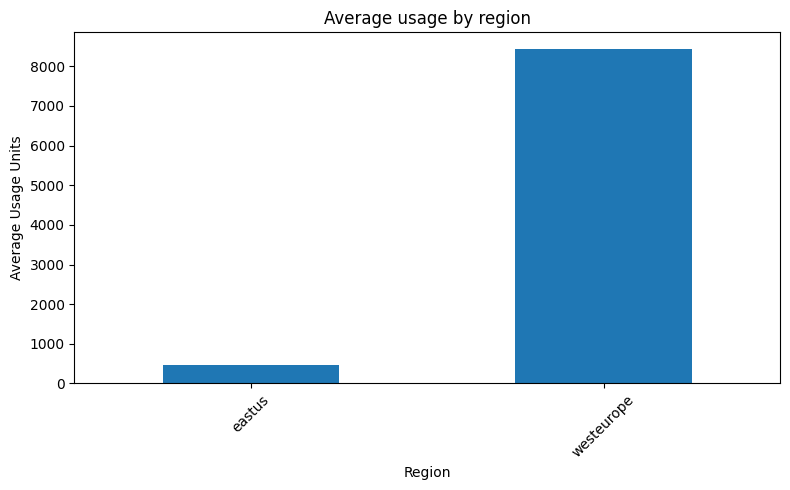

In [ ]:
avg_region_usage=df.groupby("Region")["Usage_Units"].mean()
plt.figure(figsize=(8,5))
avg_region_usage.plot(kind="bar")
plt.title("Average usage by region")
plt.xlabel("Region")
plt.ylabel("Average Usage Units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

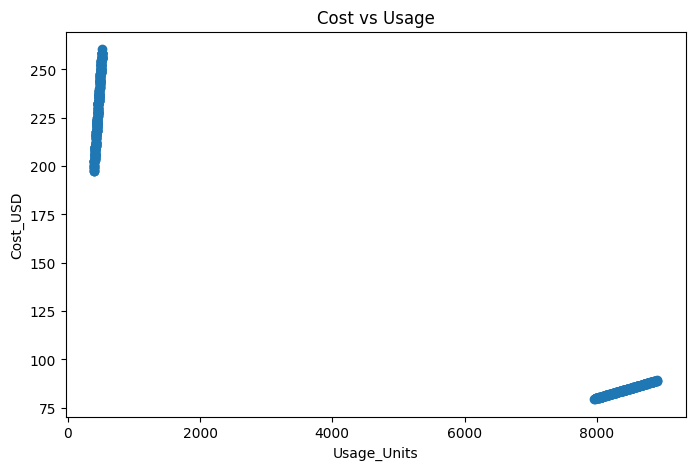

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df["Usage_Units"],df["Cost_USD"])
plt.title("Cost vs Usage")
plt.xlabel("Usage_Units")
plt.ylabel("Cost_USD")
plt.show()

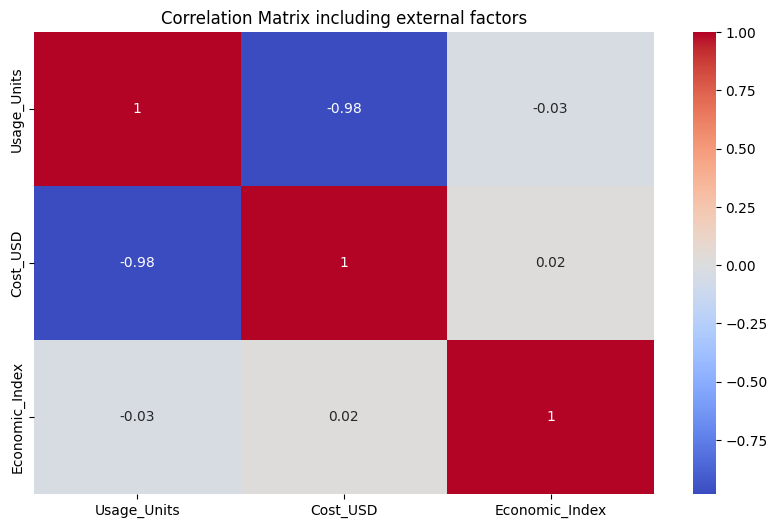

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[[
    "Usage_Units",
    "Cost_USD",
    "Economic_Index"
]].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix including external factors")
plt.show()

In [ ]:
Correlation=df["Usage_Units"].corr(df["Cost_USD"])
Correlation

np.float64(-0.9822313314742117)

*a strong negative correlation (-0.98) was observed between usage and cost this indicates an inverse relationship in the dataset.the behaviour may result from cummulative usage patterns or structured data generation rather han real world billing dynamics*

In [ ]:
#feature engineering and data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("dataset.xlsx")
df.head()
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             540 non-null    object 
 1   Region                540 non-null    object 
 2   Service               540 non-null    object 
 3   Usage_Units           540 non-null    int64  
 4   Provisioned_Capacity  540 non-null    int64  
 5   Cost_USD              540 non-null    float64
 6   Availability_%        540 non-null    float64
 7   Holiday               540 non-null    int64  
 8   Economic_Index        540 non-null    float64
 9   Seasonal_Factor       540 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 42.3+ KB


,Usage_Units,Provisioned_Capacity,Cost_USD,Availability_%,Holiday,Economic_Index
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,4446.746296,5775.000000,156.743704,99.916852,0.285185,99.882889
std,3996.541343,5261.754665,73.523959,0.034287,0.451921,5.892948
min,395.000000,500.000000,79.500000,99.850000,0.000000,90.090000
25%,458.750000,550.000000,84.290000,99.900000,0.000000,94.595000
50%,4235.500000,5300.000000,143.330000,99.910000,0.000000,99.675000
75%,8429.000000,11000.000000,229.125000,99.950000,1.000000,105.150000
max,8916.000000,12000.000000,260.500000,99.950000,1.000000,109.970000


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp')

In [ ]:
df['Day']=df['Timestamp'].dt.day
df['Month']=df['Timestamp'].dt.month
df['Week']=df['Timestamp'].dt.isocalendar().week
df['Quarter']=df['Timestamp'].dt.quarter
df['DayOfWeek']=df['Timestamp'].dt.dayofweek
print(df)

     Timestamp      Region  Service  Usage_Units  Provisioned_Capacity  \
0   2023-01-01      eastus  Compute          401                   500   
1   2023-01-01  westeurope  Storage         8028                 10000   
2   2023-01-02      eastus  Compute          408                   500   
3   2023-01-02  westeurope  Storage         7984                 10000   
4   2023-01-03      eastus  Compute          411                   500   
..         ...         ...      ...          ...                   ...   
535 2023-09-25  westeurope  Storage         8822                 12000   
536 2023-09-26      eastus  Compute          514                   600   
537 2023-09-26  westeurope  Storage         8793                 12000   
538 2023-09-27      eastus  Compute          521                   600   
539 2023-09-27  westeurope  Storage         8848                 12000   

     Cost_USD  Availability_%  Holiday  Economic_Index Seasonal_Factor  \
0      200.50           99.90        

In [ ]:
df['Utilization']=df['Usage_Units']/df['Provisioned_Capacity']

In [ ]:
df['lag_1']=df['Usage_Units'].shift(1)
df['lag_7']=df['Usage_Units'].shift(7)
df['lag_30']=df['Usage_Units'].shift(30)

In [ ]:
import pandas as pd
df = pd.read_excel("dataset.xlsx")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp')
df['Rolling_Mean_7']=df['Usage_Units'].rolling(window=7).mean()
df['Rolling_Mean_30']=df['Usage_Units'].rolling(window=30).mean()
print(df)

     Timestamp      Region  Service  Usage_Units  Provisioned_Capacity  \
0   2023-01-01      eastus  Compute          401                   500   
1   2023-01-01  westeurope  Storage         8028                 10000   
2   2023-01-02      eastus  Compute          408                   500   
3   2023-01-02  westeurope  Storage         7984                 10000   
4   2023-01-03      eastus  Compute          411                   500   
..         ...         ...      ...          ...                   ...   
535 2023-09-25  westeurope  Storage         8822                 12000   
536 2023-09-26      eastus  Compute          514                   600   
537 2023-09-26  westeurope  Storage         8793                 12000   
538 2023-09-27      eastus  Compute          521                   600   
539 2023-09-27  westeurope  Storage         8848                 12000   

     Cost_USD  Availability_%  Holiday  Economic_Index Seasonal_Factor  \
0      200.50           99.90        

In [ ]:
df['Demand_Spike']=(df['Usage_Units']>
                    df['Rolling_Mean_7']).astype(int)

In [ ]:
df=pd.get_dummies(df,columns=['Region','Service'],
                  drop_first=True)

In [ ]:
df=df.dropna()

In [ ]:
df.to_excel('processed_dataset.xlsx',index=False)

In [2]:
import pandas as pd
df = pd.read_excel('processed_dataset.xlsx')

In [3]:
X = df.drop(['Usage_Units','Timestamp'],axis=1)
Y = df['Usage_Units']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(
    X,Y,test_size=0.2,shuffle=False
)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor()

In [10]:
Y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

print("MAE:",mae)
print("RMSE:",rmse)

MAE: 402.883725490196
RMSE: 741.3201892173021
